# Ensemble Classification

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [2]:
def device():
    if torch.mps.is_available():
        return torch.device("mps")
    elif torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [3]:
N_SEED = 19
TOP_K = 5
VERBOSE = 1
N_JOBS = 4
COLOR_MAP = "RdYlBu"
DOT_SIZE = 4
TEST_RATIO = 0.2
L_FONT = {
    "color": "darkblue",
    "size": 11
}
T_COLOR = "darkred"

torch.manual_seed(N_SEED)

np.random.seed(N_SEED)
plt.style.use("ggplot")

In [4]:
def show_corr(features, target):
    plt.figure(figsize=(19, 15))
    features.corrwith(target).plot.bar(color="orange", grid=True)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def show_corr_heatmap(data):
    corr = data.corr() * 100
    plt.figure(figsize=(20, 15))
    sns.heatmap(
        corr,
        annot=True,
        cmap=COLOR_MAP,
        fmt=".2f",
        vmax=100,
        vmin=-100,
    )
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(T_COLOR)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(T_COLOR)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_features(x, y):
    for col in x.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_figwidth(12)
        fig.suptitle("X: {i}".format(i=col), fontdict={"color": "darkblue"})
        ax1.scatter(x[col], y, color="red", s=DOT_SIZE,)
        ax1.spines["bottom"].set_color(T_COLOR)
        ax1.spines["top"].set_color(None)
        ax1.spines["left"].set_color(T_COLOR)
        ax1.spines["right"].set_color(None)
        ax1.tick_params(axis="x", colors=T_COLOR)
        ax1.tick_params(axis="y", colors=T_COLOR)
        ax2.hist(x[col], color="orange")
        ax2.spines["bottom"].set_color(T_COLOR)
        ax2.spines["top"].set_color(None)
        ax2.spines["left"].set_color(T_COLOR)
        ax2.spines["right"].set_color(None)
        ax2.tick_params(axis="x", colors=T_COLOR)
        ax2.tick_params(axis="y", colors=T_COLOR)
        plt.show();


def plot_class_dist(target):
    unique, counts = np.unique(target, return_counts=True)
    plt.bar(unique, counts, color="darkblue",)
    plt.xlabel("Class", fontdict=L_FONT)
    plt.ylabel("Population", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_xticks(ticks=unique, labels=unique)
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color="orange", label="AUC = %0.4f" % roc_auc,)
    plt.legend(loc = "lower right")
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel("TPR", fontdict=L_FONT)
    plt.xlabel("FPR", fontdict=L_FONT)
    ax = plt.gca()
    ax.set_title("Receiver Operating Characteristic", fontdict={"color": "darkblue"})
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_classification(y_true, y_pred):
    precision, recall, f1, support = metrics.precision_recall_fscore_support(y_true, y_pred)
    sns.heatmap(
        (precision*100, recall*100, f1*100),
        annot=True, cmap=COLOR_MAP,
        fmt=".4f",
        yticklabels=("precision", "recall", "f1"),
        vmax=100,
        vmin=0,
    )
    ax = plt.gca()
    ax.set_title("Classification Report", fontdict=L_FONT)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    plt.show();


def plot_Xy(x, target, x_line=None, y_line=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x_line is not None and y_line is not None:
        plt.plot(x_line, y_line,'-', color="orange")
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();


def plot_Xy2(x, target, x2=None, target2=None, file_name=None):
    plt.scatter(x, target, color="red", s=DOT_SIZE,)
    ax = plt.gca()
    ax.spines["bottom"].set_color(T_COLOR)
    ax.spines["top"].set_color(None)
    ax.spines["left"].set_color(T_COLOR)
    ax.spines["right"].set_color(None)
    ax.tick_params(axis="x", colors=T_COLOR)
    ax.tick_params(axis="y", colors=T_COLOR)
    if x2 is not None and target2 is not None:
        plt.plot(x2, target2, '-', color="orange", linewidth=2)
    plt.xlabel("X", fontdict=L_FONT)
    plt.ylabel("y", fontdict=L_FONT)
    if file_name is not None:
        plt.savefig(file_name)
    plt.show();

## Quality  Check Dataset

In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

### EDA

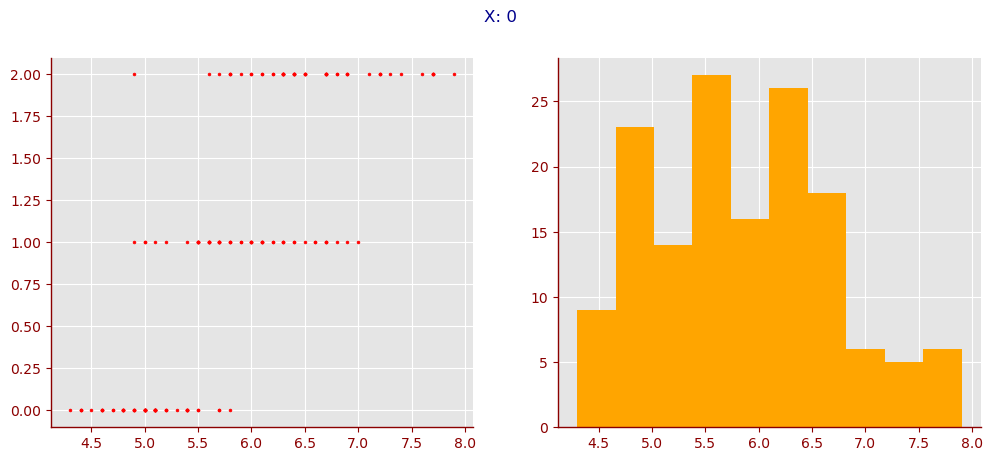

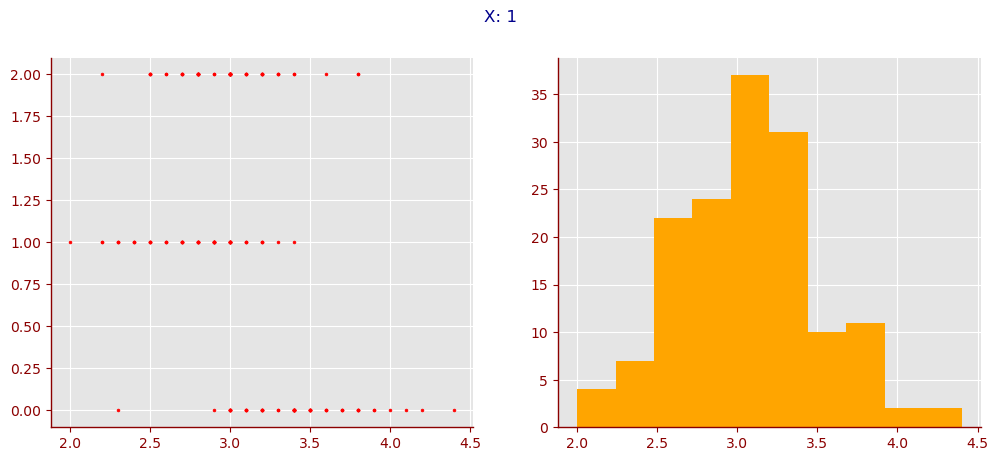

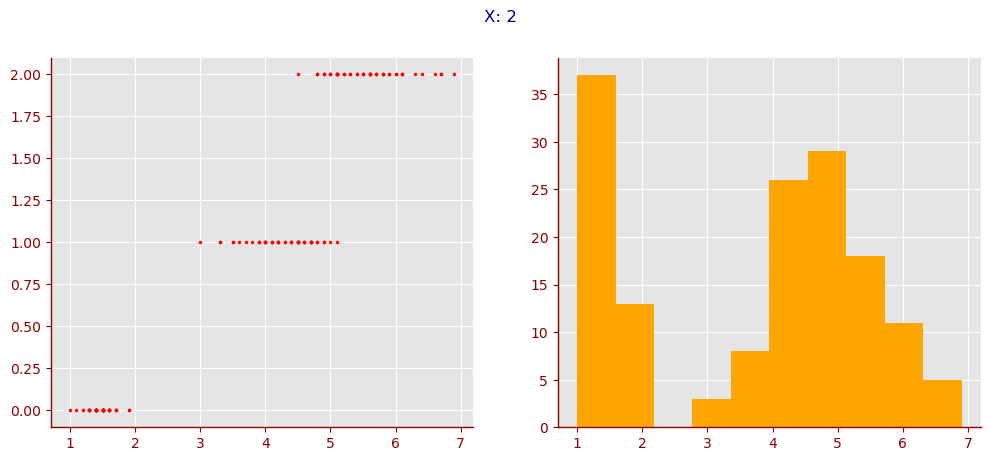

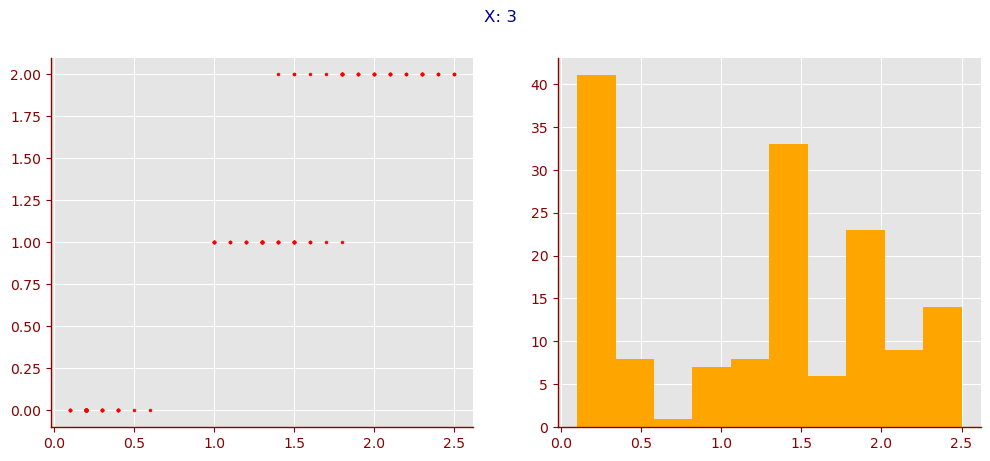

In [6]:
plot_features(pd.DataFrame(X), y)

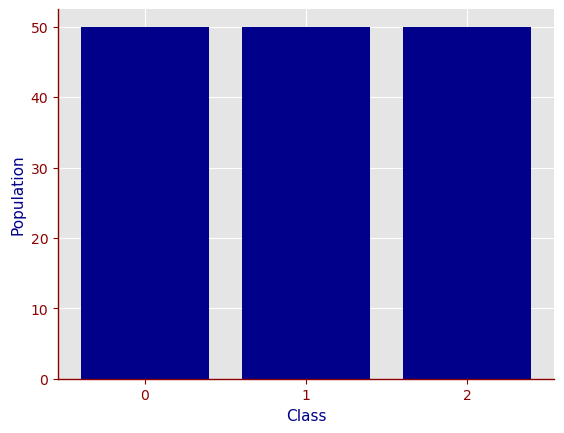

In [7]:
plot_class_dist(y)

In [8]:
def to_ts(data):
    return torch.as_tensor(data, dtype=torch.float32, device=device())

In [9]:
classes = np.unique(y)

y_tmp = np.array(y).reshape(-1, 1)
y_tmp = y_tmp == classes
y = to_ts(y_tmp)

In [10]:
scaler = MinMaxScaler()  
X = scaler.fit_transform(X)

In [11]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X,
    y,
    test_size=TEST_RATIO,
    random_state=N_SEED,
)

X_train, X_test, y_train, y_test = to_ts(X_train_t), to_ts(X_test_t), to_ts(y_train_t), to_ts(y_test_t)

In [12]:
_, INPUT_SIZE = X_train.shape
_, OUTPUT_SIZE = y_train.shape

HIDDEN_SIZE1 = 10
HIDDEN_SIZE2 = 9
LR = 0.01
NO_EPOCHS = 100
BATCH_SIZE = 8
STEP = 1

In [13]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._n_samples = len(self._x)

    def __getitem__(self, index):
        return self._x[index], self._y[index]

    def __len__(self):
        return self._n_samples
    
    def x(self):
        return self._x

    def y(self):
        return self._y


class EarlyStop():
    def __init__(self, patience: int=3, delta: float=1e-3, monitor: str="loss"):
        self.patience = patience
        self.pre_indicator = None
        self.delta = delta
        self.counter = 0
        self.stop = False
        self.monitor = monitor
    
    def __call__(self, watch: dict):
        if self.pre_indicator is not None:
            diff = abs(watch[self.monitor] - self.pre_indicator)
            if diff <= self.delta:
                self.counter += 1
            else:
                self.counter = 0
        if self.counter >= self.patience:
            self.stop = True
        self.pre_indicator = watch[self.monitor]
        return self.stop


class ClassifierNN(torch.nn.Module):
    def __init__(self, input, hidden1, hidden2, output):
        super(ClassifierNN, self).__init__()
        self.layer1 = torch.nn.Linear(in_features=input, out_features=hidden1)
        self.layer2 = torch.nn.Linear(in_features=hidden1, out_features=hidden2)
        self.layer3 = torch.nn.Linear(in_features=hidden2, out_features=output)
        self.activation = torch.nn.functional.relu

    def forward(self, x):
        out = self.layer1(x)
        out = self.activation(out)
        out = self.layer2(out)
        out = self.activation(out)
        out = self.layer3(out)
        return out

    def fit(
        self: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        optimizer: torch.optim.Optimizer,
        epochs: int=100,
        verbose: int=0,
        step: int=1,
        early_stop: EarlyStop=None,
    ) -> torch.nn.Module:
        if verbose:
            print("---START---")
        recall = 0.0
        loss = torch.nn.Module
        loss_fn = torch.nn.CrossEntropyLoss()
        accuracy = 0.0
        recall = 0.0
        precision = 0.0
        watch = {
                "accuracy": accuracy,
                "recall": recall,
                "precision": precision,
                "loss": 0.0
        }
        for epoch in range(epochs):
            for _X, _y in data_loader:
                y_hat = self(_X)
                loss = loss_fn(y_hat, _y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            watch = {
                "loss": loss.detach(),
            }
            if (epoch + 1) % step == 0 and verbose:
                print(
                    ">>> Epoch: {}/{}, Loss={:.6f}".format(
                        epoch + 1, epochs, watch["loss"]
                    )
                )
            if early_stop is not None and early_stop(watch):
                if verbose:
                    print(f"Early stop at epoch: {epoch + 1}/{epochs}")
                break
        if verbose:
            print(
                "Completed, Loss={:.6f}".format(
                    watch["loss"]
                )
            )
            print("---END---")
        return self

In [14]:
data_train = Dataset(
    x=X_train,
    y=y_train,
)

data_train_loader = torch.utils.data.DataLoader(
    dataset=data_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [15]:
model_ANN = ClassifierNN(
    input=INPUT_SIZE,
    hidden1=HIDDEN_SIZE1,
    hidden2=HIDDEN_SIZE2,
    output=OUTPUT_SIZE,
).to(device=device())

optimizer = torch.optim.SGD(
    model_ANN.parameters(),
    lr=LR,
    momentum=0.9,
)

early_stop = EarlyStop(
    patience=7,
    delta=3e-4,
    monitor="loss"
)

model_ANN = model_ANN.fit(
    data_loader=data_train_loader,
    optimizer=optimizer,
    epochs=NO_EPOCHS,
    verbose=VERBOSE,
    step=STEP,
    # early_stop=early_stop,
)

---START---
>>> Epoch: 1/100, Loss=1.156765
>>> Epoch: 2/100, Loss=1.124019
>>> Epoch: 3/100, Loss=1.094853
>>> Epoch: 4/100, Loss=1.058403
>>> Epoch: 5/100, Loss=1.071777
>>> Epoch: 6/100, Loss=1.019679
>>> Epoch: 7/100, Loss=0.936768
>>> Epoch: 8/100, Loss=0.968448
>>> Epoch: 9/100, Loss=0.817898
>>> Epoch: 10/100, Loss=0.660816
>>> Epoch: 11/100, Loss=0.686371
>>> Epoch: 12/100, Loss=0.563060
>>> Epoch: 13/100, Loss=0.433972
>>> Epoch: 14/100, Loss=0.390752
>>> Epoch: 15/100, Loss=0.641284
>>> Epoch: 16/100, Loss=0.503612
>>> Epoch: 17/100, Loss=0.207331
>>> Epoch: 18/100, Loss=0.388309
>>> Epoch: 19/100, Loss=0.369448
>>> Epoch: 20/100, Loss=0.353181
>>> Epoch: 21/100, Loss=0.327263
>>> Epoch: 22/100, Loss=0.346538
>>> Epoch: 23/100, Loss=0.285970
>>> Epoch: 24/100, Loss=0.311051
>>> Epoch: 25/100, Loss=0.315976
>>> Epoch: 26/100, Loss=0.242038
>>> Epoch: 27/100, Loss=0.280875
>>> Epoch: 28/100, Loss=0.235213
>>> Epoch: 29/100, Loss=0.228112
>>> Epoch: 30/100, Loss=0.338910
>>> Epo

In [16]:
y_proba = torch.nn.functional.softmax(model_ANN(X_test), dim=1)
y_proba_np = y_proba.cpu().detach().numpy()
y_pred_np = y_proba_np.round()
y_test_np = y_test.cpu().detach().numpy()

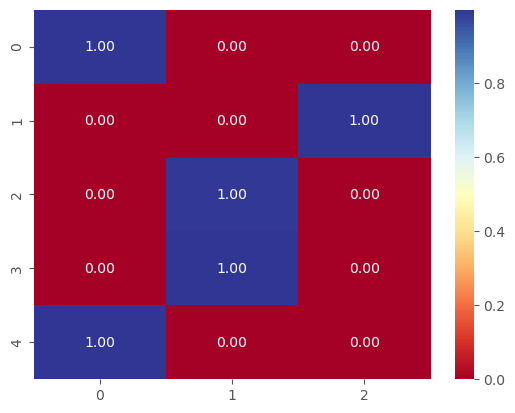

In [17]:
sns.heatmap(y_proba_np[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

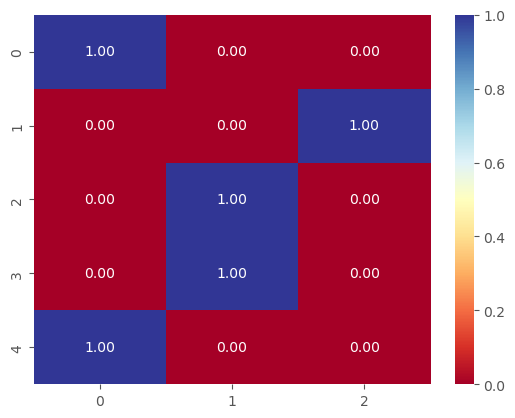

In [18]:
sns.heatmap(y_test_np[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f", vmin=0);

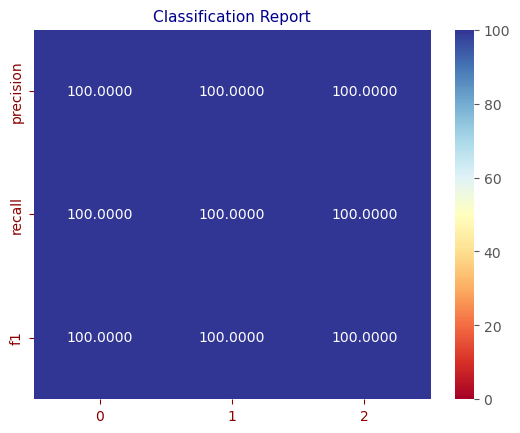

In [19]:
plot_classification(y_true=y_test_np, y_pred=y_pred_np)

In [20]:
metrics.accuracy_score(y_true=y_test_np, y_pred=y_pred_np)

1.0